# Linear Regression

In [1]:
# Chargement du package boston
from sklearn.datasets import load_boston

# Chargement du package de base de données de boston prêt à être utilisé
boston = load_boston()

# Affichage de la variable
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
# Nom des colonnes
columns = boston.feature_names
print(columns)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# Description du dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Chargement du package pandas
import pandas

# Création du DataFrame (tableau)
boston_df = pandas.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df.shape[0]

506

In [6]:
x = boston.data
y = boston.target

# Création du DataFrame
y_df = pandas.DataFrame(y)
y_df.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
# Affichage du nom des colonnes
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Nombre de lignes et colonnes
boston_df.shape

(506, 13)

In [9]:
# Affichage du type de chaque colonne (infos type base de données)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
# Permet la visualisation de données
import seaborn

# Permettre d'afficher le tracé
%matplotlib inline
boston_df_ext = boston_df.copy()
boston_df_ext['MEDV'] = y

C:\Users\doria\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


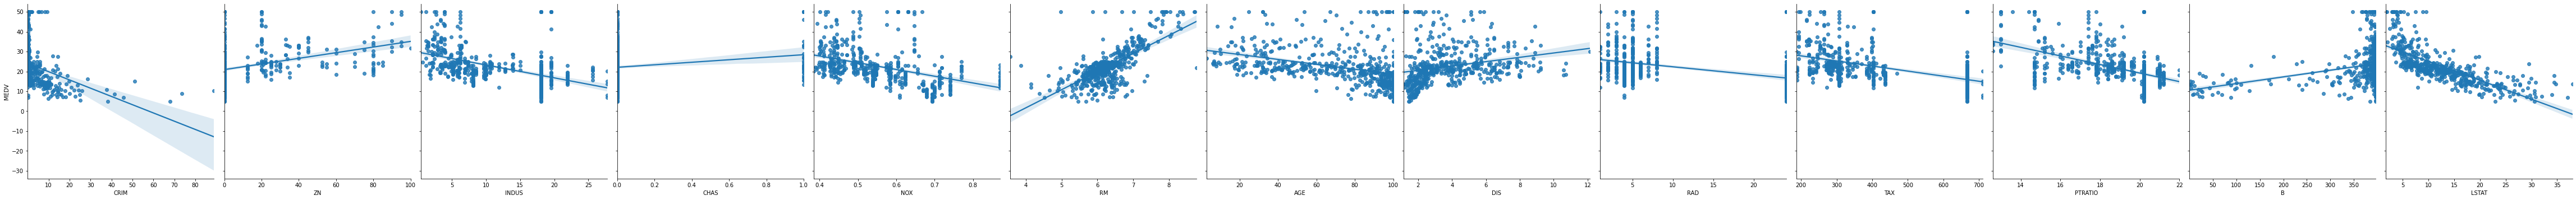

In [11]:
# Affichage des relations
seaborn.pairplot(boston_df_ext, x_vars=columns, y_vars='MEDV', size=5, kind='reg')

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [13]:
# Permet de faire de la LinearRegression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# Déclaration du modèle en fonction des données (fit)
linreg.fit(x_train, y_train)

LinearRegression()

In [14]:
# Affichage de l'intercept (float)
print(linreg.intercept_)

42.93352585337743


In [15]:
# Affichage des noms de colonnes en fonction de leur coefficients sous forme de liste
list(zip(columns, linreg.coef_))

[('CRIM', -0.11238686745728327),
 ('ZN', 0.05805870735149824),
 ('INDUS', 0.018359355933583767),
 ('CHAS', 2.129977599731913),
 ('NOX', -19.581101224686552),
 ('RM', 3.095461657079218),
 ('AGE', 0.00445265227565913),
 ('DIS', -1.5004762414744035),
 ('RAD', 0.30535896936796425),
 ('TAX', -0.011123087897877146),
 ('PTRATIO', -0.989007562322306),
 ('B', 0.007321300169404675),
 ('LSTAT', -0.5446449971618609)]

In [16]:
# Faire les prédictions
y_pred = linreg.predict(x_test)

In [17]:
import numpy
from sklearn import metrics

print(numpy.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.8353734582005465


In [18]:
# Affichage de la donnée 51 (ligne 50)
boston_df.iloc[50:51].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45


In [19]:
# Affichage des données 505 et 506 (ligne 504 et 505)
boston_df.iloc[504:506].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [20]:
# Changement de l'index de la ligne
y_pred = linreg.predict(boston_df.iloc[50:51])
print('- could got a price of : {} '.format(y_pred) )

- could got a price of : [21.56039533] 


In [21]:
# Changement de l'index de la ligne
y_pred = linreg.predict(boston_df.iloc[50:51])

# Affichage de la donnée 22 (ligne 21)
boston_df.iloc[y_pred].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83


In [22]:
# Affichage du prix réel
print('- Real price is : {} '.format(y[50]))

- Real price is : 19.7 


In [23]:
# Chargement du package pandas
import pandas

# Lecture du fichier csv
trains = pandas.read_csv('data/Train.csv')

# Affichage des données
trains.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [24]:
trains_df = pandas.DataFrame(trains)

In [25]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               16466 non-null  float64
 1   Y                               16466 non-null  float64
 2   target_2015                     16466 non-null  float64
 3   elevation                       16466 non-null  float64
 4   precip 2014-11-16 - 2014-11-23  16466 non-null  float64
 5   precip 2014-11-23 - 2014-11-30  16466 non-null  float64
 6   precip 2014-11-30 - 2014-12-07  16466 non-null  float64
 7   precip 2014-12-07 - 2014-12-14  16466 non-null  float64
 8   precip 2014-12-14 - 2014-12-21  16466 non-null  float64
 9   precip 2014-12-21 - 2014-12-28  16466 non-null  float64
 10  precip 2014-12-28 - 2015-01-04  16466 non-null  float64
 11  precip 2015-01-04 - 2015-01-11  16466 non-null  float64
 12  precip 2015-01-11 - 2015-01-18  